In [1]:
import pandas as pd
import numpy as np
import os
import glob
import sys

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import seaborn as sns

import src.utils as my_u
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()


file_list = glob.glob("./dataset/muraro/RAW/data.csv")
print(file_list)

['./dataset/muraro/RAW/data.csv']


In [2]:
total_data = pd.DataFrame()
for ff in file_list:
    data = pd.read_csv(ff, sep='\t', index_col=0)
    total_data = total_data.append(data)
    print(total_data.shape)

new_index = []
tmp_index = total_data.index
for ll in tmp_index:
    new_index.append(ll.split("__")[0])
total_data.index = new_index


labels = pd.read_csv('./dataset/muraro/RAW/cell_type_annotation_Cels2016.csv', sep='\t', index_col=0)
labels.columns = ['labels']
label_colname = labels.columns[0]
labels.index = [l.replace(".","-") for l in labels.index]
labels = labels.transpose().filter(items=total_data.columns)
#labels = labels[0]

total_data = total_data.append(labels)
total_data = total_data.transpose()
#print(total_data)
total_data[label_colname] = total_data[label_colname].replace(np.nan, 'nolabel')
label_set = set(labels)
print(len(labels))

us = total_data[label_colname] != 'nolabel'
total_data = total_data.loc[us,]
labels = total_data[label_colname]
total_data.pop(label_colname)
total_data = total_data.astype('float32')
#print(total_data)

labels = labels.values.tolist()

(19140, 3072)
1


In [3]:
whole_exp = total_data
raw_result, raw_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
log2_result, log2_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
total_result, total_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
total_log2_result, total_log2_df = my_u.tsne_get(whole_exp, labels)
#######

whole_exp = total_data
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_raw_result, mm_raw_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_log2_result, mm_log2_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data.iloc[:,2:]
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)  
whole_exp = whole_exp.replace(np.nan,0) 
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_result, mm_total_df = my_u.tsne_get(whole_exp, labels)
#######
whole_exp = total_data
whole_exp = whole_exp.divide(whole_exp.sum(1), axis = 0).mul(20000)         
whole_exp = whole_exp.replace(np.nan,0) 
whole_exp = np.log2(whole_exp + 1.0)
np.transpose(min_max_scaler.fit_transform(whole_exp.transpose()))
mm_total_log2_result, mm_total_log2_df = my_u.tsne_get(whole_exp, labels)

kmeans #cluster: 6 ARI: 0.7673443733642009 Silhouette: 0.5598977
kmeans #cluster: 4 ARI: 0.7065789179588023 Silhouette: 0.54711235
kmeans #cluster: 5 ARI: 0.8572278111252648 Silhouette: 0.5767355
kmeans #cluster: 9 ARI: 0.7122247976077479 Silhouette: 0.47010344
kmeans #cluster: 5 ARI: 0.7244385384297297 Silhouette: 0.53719705
kmeans #cluster: 4 ARI: 0.6974728630846476 Silhouette: 0.52636147
kmeans #cluster: 5 ARI: 0.8683086188958398 Silhouette: 0.5918067
kmeans #cluster: 7 ARI: 0.7309410997902825 Silhouette: 0.5799225


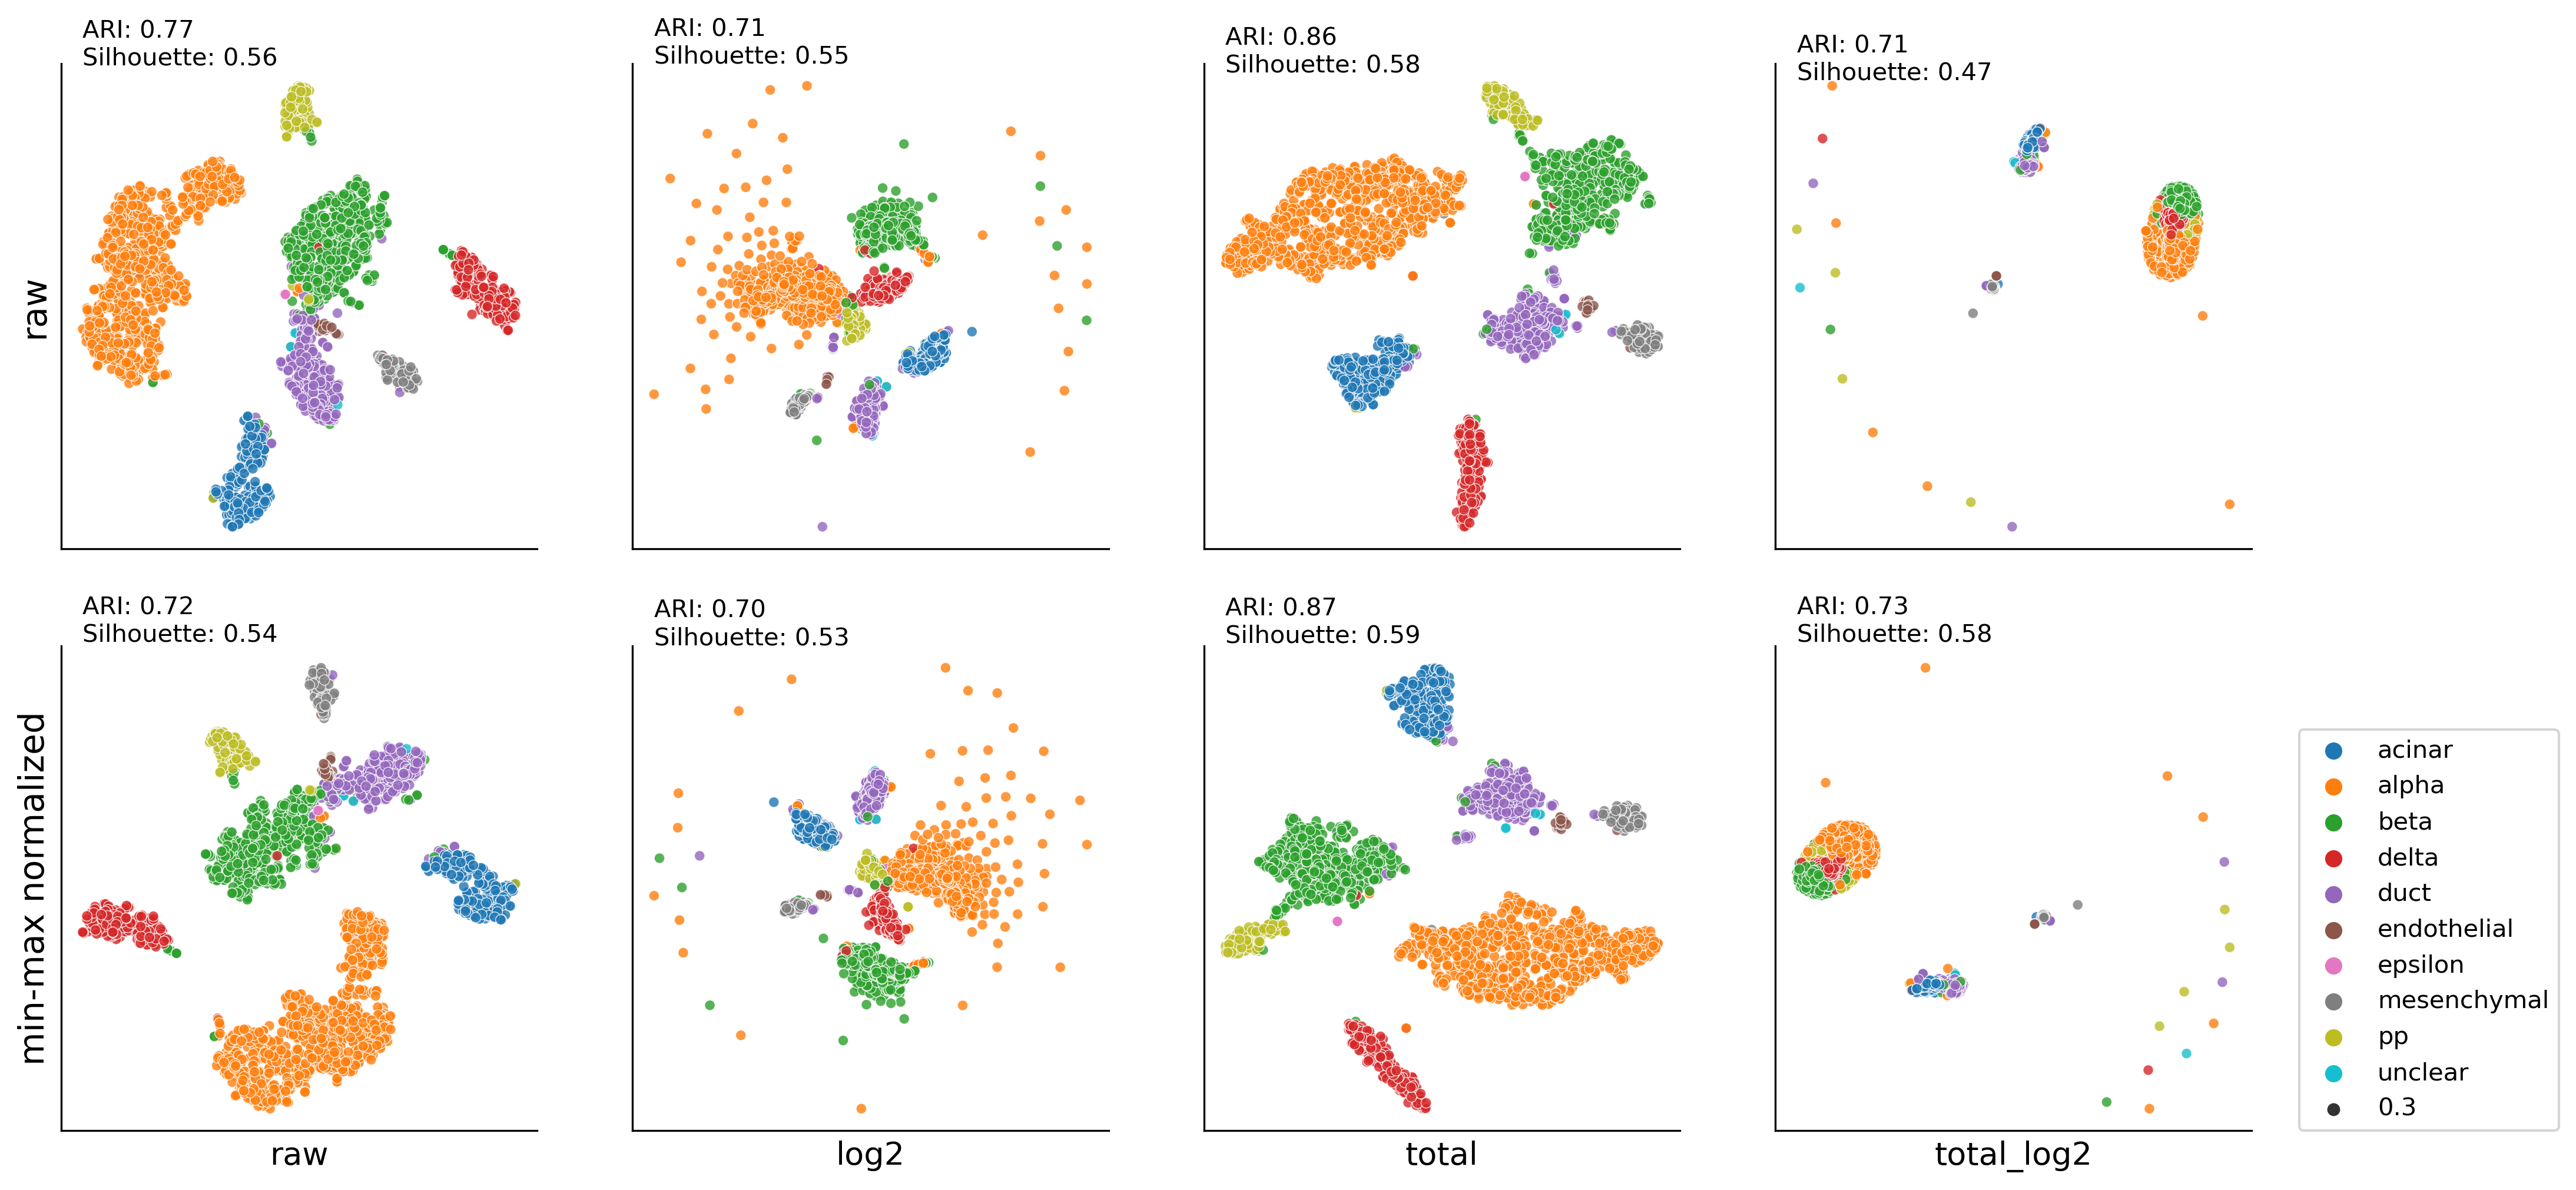

In [4]:
plt.figure(figsize=(16,8), dpi=300)
ax00 = plt.subplot2grid((2,4), (0,0)) 
ax10 = plt.subplot2grid((2,4), (0,1))  
ax20 = plt.subplot2grid((2,4), (0,2))  
ax30 = plt.subplot2grid((2,4), (0,3))  

ax01 = plt.subplot2grid((2,4), (1,0)) 
ax11 = plt.subplot2grid((2,4), (1,1))  
ax21 = plt.subplot2grid((2,4), (1,2))  
ax31 = plt.subplot2grid((2,4), (1,3))  

my_u.draw_plot(raw_df, raw_result, ax00, labels)
my_u.draw_plot(log2_df, log2_result, ax10, labels)
my_u.draw_plot(total_df, total_result, ax20, labels)
my_u.draw_plot(total_log2_df, total_log2_result, ax30, labels)
my_u.draw_plot(mm_raw_df, mm_raw_result, ax01, labels)
my_u.draw_plot(mm_log2_df, mm_log2_result, ax11, labels)
my_u.draw_plot(mm_total_df, mm_total_result, ax21, labels)
my_u.draw_plot(mm_total_log2_df, mm_total_log2_result, ax31, labels)

ax00.set_ylabel('raw' , fontsize=14)

ax01.set_xlabel('raw', fontsize=13)
ax11.set_xlabel('log2', fontsize=13)
ax21.set_xlabel('total', fontsize=13)
ax31.set_xlabel('total_log2', fontsize=13)
ax01.set_ylabel('min-max normalized' , fontsize=14)
ax31.legend(bbox_to_anchor=(1.1,0), loc='lower left',borderaxespad=0)